<h1>Phase 1 (Data Cleaning Phase)</h1>

<h3>1. Import required libraries</h3>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>2. Read the csv </h3>

In [20]:
raw_data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

<h3>3. Show first five results</h3>

In [21]:
raw_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<h3>4. Show if columns have any NaN,N/A or null values in boolean form</h3>

In [22]:
null_check = raw_data.isna() | raw_data.eq('N/A') #check if a column has either 'N/A or NaN values

print("Has null, or N/A values")

for col in null_check.columns:
    print(f"{col:<15} - {null_check[col].any()}")#print column name with padding followed by null_check[col].any() which evaluates to true if any value in the column is true

Has null, or N/A values
Name            - True
Platform        - False
Year_of_Release - True
Genre           - True
Publisher       - True
NA_Sales        - False
EU_Sales        - False
JP_Sales        - False
Other_Sales     - False
Global_Sales    - False
Critic_Score    - True
Critic_Count    - True
User_Score      - True
User_Count      - True
Developer       - True
Rating          - True


<h3>5. Check how many null,empty,N/A values are there in each column</h3>

In [23]:
na_count = raw_data.isna().sum() #get the sum of NaN values (in pandas null and NaN are the same thing)
empty_count = raw_data.eq('N/A').sum()#get the num of 'N/A' values

counts_df = pd.concat([na_count, empty_count], axis=1) #concat the sums
counts_df.columns = ['NaN Count', 'N/A Count'] #set the column names

counts_df #print the NaN and 'N/A' counts dataframe

,NaN Count,N/A Count
Name,2,0
Platform,0,0
Year_of_Release,269,0
Genre,2,0
Publisher,54,0
NA_Sales,0,0
EU_Sales,0,0
JP_Sales,0,0
Other_Sales,0,0
Global_Sales,0,0


<h3>6. Show null values of each column with the help of Heatmap</h3>

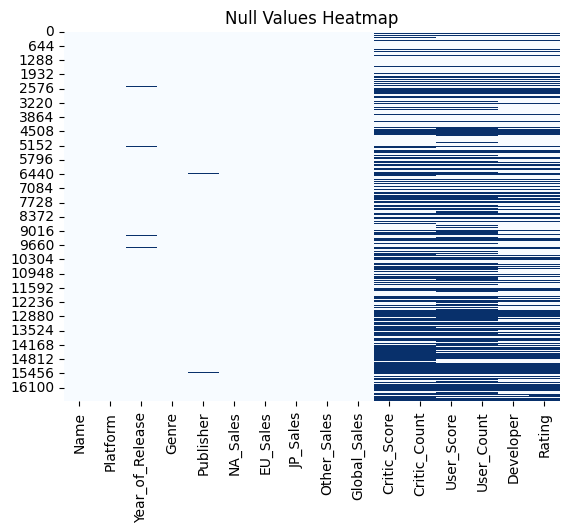

In [24]:
# Create a boolean mask of null values
null_mask = raw_data.isnull()

# Create a heatmap of null values
sns.heatmap(null_mask, cmap='Blues', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

<h3>7. Drop outliers (columns which are not useful according to you)</h3>

In [25]:
#check to see if Global sales can be dropped by checking if it equals the sum of other sales columns

# Create a boolean mask for rows where Global_Sales equals sum of other sales columns
mask = raw_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1) == raw_data['Global_Sales']
raw_data[~mask]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16238,Vanark,PS,1999.0,Shooter,Jaleco,0.01,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16256,Bratz: Forever Diamondz,PS2,2006.0,Adventure,THQ,0.01,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,Blitz Games,E
16292,K-1 Grand Prix,PS,1999.0,Fighting,Jaleco,0.01,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16680,G1 Jockey 4 2008,PS3,2008.0,Sports,Tecmo Koei,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


There are rows where Global sales does not equal the sum of the other sales columns, do not drop

<h3>8. Drop the null values containing rows from the object which you created in
point 7</h3>

In [26]:
df = raw_data.dropna(axis = 0, how = 'any') #drop rows with any NaN values

<h3>9. Check the dataframe again if there is anything which you want to remove
more.</h3>

In [27]:
df.sort_values(by="Global_Sales", ascending=True)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+
16205,Aeon Flux,XB,2005.0,Action,THQ,0.01,0.00,0.00,0.00,0.01,69.0,27.0,3.0,4.0,Terminal Reality,T
16210,Impossible Creatures,PC,2002.0,Strategy,Microsoft Game Studios,0.00,0.01,0.00,0.00,0.01,72.0,30.0,8.0,39.0,Relic,T
16211,Serious Sam II,PC,2005.0,Shooter,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01,74.0,31.0,7.0,152.0,Croteam,M
16230,Monster Rancher Advance 2,GBA,2002.0,Simulation,Tecmo Koei,0.01,0.00,0.00,0.00,0.01,79.0,5.0,9.4,9.0,"Tecmo, Graphic Research",E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


Drop rows that don't have enough sales to show up in the graphs

In [28]:
df = df.drop(df[df['Global_Sales'] < 1.5].index)

In [29]:
# Convert the Year_of_Release column to an integer type
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')

In [30]:
df.sort_values(by="Global_Sales", ascending=True)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1264,Star Wars: The Force Unleashed II,PS3,2010,Action,LucasArts,0.80,0.49,0.00,0.21,1.50,63.0,41.0,6.8,121.0,LucasArts,T
1254,SoulCalibur II,GC,2003,Fighting,Namco Bandai Games,0.99,0.32,0.11,0.08,1.50,93.0,45.0,9.1,135.0,Namco,T
1255,Call of Duty 3,PS3,2006,Shooter,Activision,0.60,0.62,0.03,0.26,1.50,80.0,43.0,6.9,92.0,Treyarch,T
1259,Madden NFL 2001,PS2,2000,Sports,Electronic Arts,1.19,0.07,0.05,0.20,1.50,91.0,25.0,7.7,7.0,EA Sports,E
1258,Red Faction II,PS2,2002,Shooter,THQ,0.49,0.78,0.00,0.23,1.50,84.0,30.0,8.3,35.0,Volition Inc.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [31]:
df["Platform"].value_counts()#check how many values there are for each platform

PS2     173
X360    139
PS3     123
Wii      74
DS       55
PS4      55
PS       35
PC       29
XOne     26
GC       25
GBA      21
XB       18
PSP      18
3DS      14
WiiU     10
PSV       1
Name: Platform, dtype: int64

In [32]:
df = df.loc[df['Platform'] != "PSV"]#drop the psv


<h3>10. Export dataframe to your desired location with no index column<h3/>

In [33]:
df.to_csv('clean_data.csv', index=False)